Implementation of Adam and RMSProp optimizers from scratch

In [1]:
import numpy as np
import random

In [2]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
      self.m_dw, self.v_dw = 0, 0
      self.m_db, self.v_db = 0, 0
      self.beta1 = beta1
      self.beta2 = beta2
      self.epsilon = epsilon
      self.eta = eta

    def update(self, t, w, b, dw, db):
      #momentum grad
      self.m_dw = self.beta1*self.m_dw + ((1-self.beta1)*dw)
      self.m_db = self.beta1*self.m_db + ((1-self.beta1)*db)
      
      #rmsprop
      self.v_dw = self.beta2*self.v_dw + ((1-self.beta2)*(dw**2))
      self.v_db = self.beta2*self.v_db + ((1-self.beta2)*(db**2))
      
      ## bias correction
      m_dw_corr = self.m_dw/(1-self.beta1)
      m_db_corr = self.m_db/(1-self.beta1)
      v_dw_corr = self.v_dw/(1-self.beta2)
      v_db_corr = self.v_db/(1-self.beta2)

      ## update weights and biases
      w = w- self.eta* (m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
      b = b- self.eta* (m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
      loss= loss_function(w)
      return w, b, loss

In [3]:
def loss_function(m):
    return m**2-2*m+1

## take derivative
def grad_function(m):
    return 2*m-2

def check_convergence(w0, w1):
    return (w0 == w1)

In [5]:
# Initialize w_0 and b_0 with random values using function
w_0 = random.random()
b_0 = random.random()
adam = AdamOptim()
# Initialize iteration with 1
t = 1
converged = False
iter_adam, loss_adam= [], []

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0, l = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
      iter_adam.append(t)
      loss_adam.append(l)
      print('iteration '+str(t)+': weight='+str(w_0)+" loss:"+str(l))
      t+=1

iteration 1: weight=0.36726408604516814 loss:0.4003547368082564
iteration 2: weight=0.3806965694055127 loss:0.38353673914610087
iteration 3: weight=0.39632856383774606 loss:0.3644192028381983
iteration 4: weight=0.4134847200997135 loss:0.34400017355651147
iteration 5: weight=0.4317193260881454 loss:0.3229429243417117
iteration 6: weight=0.4507108745984828 loss:0.30171854328436365
iteration 7: weight=0.47021514390803837 loss:0.28067199374438045
iteration 8: weight=0.4900403324950345 loss:0.260058862481775
iteration 9: weight=0.5100323300499237 loss:0.24006831759630698
iteration 10: weight=0.53006529043319 loss:0.22083863125564207
iteration 11: weight=0.5500352449275143 loss:0.20246828080744206
iteration 12: weight=0.5698555833419586 loss:0.18502421918208678
iteration 13: weight=0.5894537459160937 loss:0.1685482267423274
iteration 14: weight=0.6087687344784813 loss:0.15306190312156898
iteration 15: weight=0.62774919762135 loss:0.13857065987154882
iteration 16: weight=0.6463519298205471 l

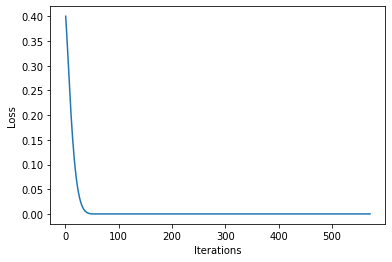

In [6]:
import matplotlib.pyplot as plt
plt.plot(iter_adam, loss_adam)
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.show()

In [7]:
class RMSProp():
    def __init__(self, eta=0.01, beta=0.9, epsilon=1e-8):
      self.v_dw, self.v_db = 0, 0
      self.beta = beta
      self.epsilon = epsilon
      self.eta = eta

    def update(self, t, w, b, dw, db):
      #rmsprop
      self.v_dw = self.beta*self.v_dw + ((1-self.beta)*(dw**2))
      self.v_db = self.beta*self.v_db + ((1-self.beta)*(db**2))
      
      ## bias correction
      v_dw_corr = self.v_dw/(1-self.beta)
      v_db_corr = self.v_db/(1-self.beta)

      ## update weights and biases
      w = w- self.eta*(dw/(np.sqrt(v_dw_corr)+self.epsilon))
      b = b- self.eta*(db/(np.sqrt(v_db_corr)+self.epsilon))
      loss= loss_function(b)
      return w, b, loss

In [8]:
w_0 = random.random()
b_0 = random.random()
rmsprop= RMSProp()

t = 1
converged = False
iter_rms, loss_rms= [], []

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0, loss = rmsprop.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
      iter_rms.append(t)
      loss_rms.append((loss))
      print('iteration '+str(t)+': weight='+str(w_0)+" loss: "+str(loss))
      t+=1

iteration 1: weight=0.3823466184977722 loss: 0.4809050742157295
iteration 2: weight=0.3895459352732548 loss: 0.47096354337887103
iteration 3: weight=0.3955460849737819 loss: 0.4627530569453576
iteration 4: weight=0.4008537193495976 loss: 0.45554753544145077
iteration 5: weight=0.40570350172432823 loss: 0.4490108620282732
iteration 6: weight=0.4102260399084933 loss: 0.4429560748116146
iteration 7: weight=0.41450251296677215 loss: 0.43726705378560915
iteration 8: weight=0.4185872595918865 loss: 0.4318661417578298
iteration 9: weight=0.42251864260509936 loss: 0.4266985717162901
iteration 10: weight=0.4263248545250165 loss: 0.42172414573431205
iteration 11: weight=0.4300272714117198 loss: 0.4169124280400105
iteration 12: weight=0.43364251076671523 loss: 0.4122397955613174
iteration 13: weight=0.43718375648921015 loss: 0.4076875389780671
iteration 14: weight=0.4406616461722074 loss: 0.40324059105403876
iteration 15: weight=0.4440848851317423 loss: 0.39888664663125273
iteration 16: weight=0.

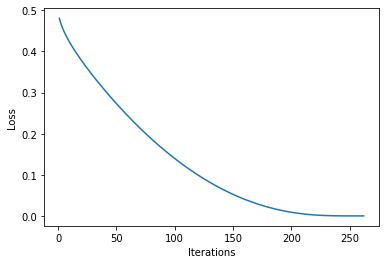

In [9]:
#plt.plot(iter, loss, label= "Adam")
plt.plot(iter_rms, loss_rms, label= "RMSProp")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.show()